In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import glob
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.layers import Dropout
import math
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [4]:
x= 1
while True:
    if x%5 ==0:
        break
    print(x)
    x+=1

1
2
3
4


In [7]:
a={1:2,'list':[1,2],3:5}
b={4:5,3:7}
a.update(b)
print(a)

{1: 2, 'list': [1, 2], 3: 7, 4: 5}


In [2]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set = train_datagen.flow_from_directory('C:/Users/KIIT/DATASET/TRAIN', target_size=(224,224), color_mode="rgb",batch_size=32, class_mode='categorical')
test_datagen = idg(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:/Users/KIIT/DATASET/TEST', target_size=(224,224),color_mode="rgb", batch_size=32, class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [4]:
from tensorflow.keras.regularizers import l1  

# 1

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9, 9), activation='relu',input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())


model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 64)        165952    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [32]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 197s 278ms/step - loss: 0.4402 - accuracy: 0.8158 - val_loss: 0.3167 - val_accuracy: 0.8914
Epoch 2/15
706/706 [==============================] - 316s 448ms/step - loss: 0.4305 - accuracy: 0.8173 - val_loss: 0.3248 - val_accuracy: 0.8957
Epoch 3/15
706/706 [==============================] - 397s 562ms/step - loss: 0.4324 - accuracy: 0.8203 - val_loss: 0.3180 - val_accuracy: 0.8938
Epoch 4/15
706/706 [==============================] - 448s 634ms/step - loss: 0.4392 - accuracy: 0.8186 - val_loss: 0.3340 - val_accuracy: 0.8774
Epoch 5/15
706/706 [==============================] - 503s 713ms/step - loss: 0.4304 - accuracy: 0.8202 - val_loss: 0.3263 - val_accuracy: 0.8882
Epoch 6/15
706/706 [==============================] - 435s 616ms/step - loss: 0.4185 - accuracy: 0.8219 - val_loss: 0.3309 - val_accuracy: 0.8894
Epoch 7/15
706/706 [==============================] - 405s 574ms/step - loss: 0.4639 - accuracy: 0.8246 - val_loss: 0.3410 -

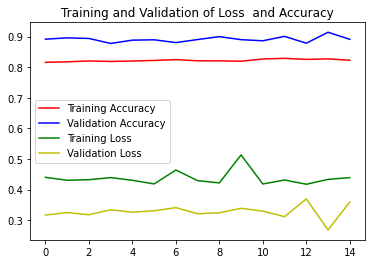

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [35]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 7s 94ms/step - loss: 0.3576 - accuracy: 0.8894
Loss on test set:  0.3575899600982666
Accuracy on test set:  0.8893752694129944
(2513,)
(2513,)


array([[1354,   47],
       [ 231,  881]], dtype=int64)

In [48]:
model.save('1cnn_garbage.h5')

# CNN2

In [89]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (9, 9), activation='relu',input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 23, 23, 128)       663680    
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 128)               409728    
_________________________________________________________________
dense_105 (Dense)            (None, 64)              

In [90]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 850s 1s/step - loss: 0.5939 - accuracy: 0.7165 - val_loss: 0.4155 - val_accuracy: 0.8559
Epoch 2/15
706/706 [==============================] - 582s 824ms/step - loss: 0.5219 - accuracy: 0.7765 - val_loss: 0.4016 - val_accuracy: 0.8468
Epoch 3/15
706/706 [==============================] - 459s 650ms/step - loss: 0.4985 - accuracy: 0.7859 - val_loss: 0.3469 - val_accuracy: 0.8552
Epoch 4/15
706/706 [==============================] - 431s 610ms/step - loss: 0.4774 - accuracy: 0.7933 - val_loss: 0.3463 - val_accuracy: 0.8719
Epoch 5/15
706/706 [==============================] - 412s 583ms/step - loss: 0.4762 - accuracy: 0.7973 - val_loss: 0.3369 - val_accuracy: 0.8802
Epoch 6/15
706/706 [==============================] - 434s 615ms/step - loss: 0.4779 - accuracy: 0.7990 - val_loss: 0.4176 - val_accuracy: 0.8225
Epoch 7/15
706/706 [==============================] - 422s 598ms/step - loss: 0.4709 - accuracy: 0.8005 - val_loss: 0.3828 - va

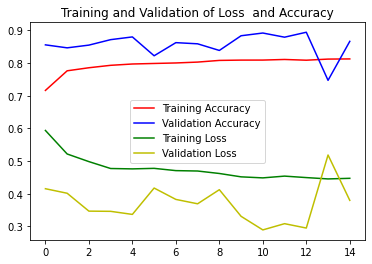

In [91]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [92]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 11s 133ms/step - loss: 0.3812 - accuracy: 0.8635
Loss on test set:  0.3811895549297333
Accuracy on test set:  0.8635097742080688
(2513,)
(2513,)


array([[1378,   23],
       [ 320,  792]], dtype=int64)

In [93]:
model.save('2cnn_garbage.h5')

# CNN3

In [94]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (9, 9), activation='relu',padding= 'same')) #secondlayer
model.add(layers.MaxPooling2D((4,4)))
model.add(layers.Flatten())
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_156 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 4, 4, 128)       

In [95]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 110s 156ms/step - loss: 0.6819 - accuracy: 0.5576 - val_loss: 0.4908 - val_accuracy: 0.8130
Epoch 2/15
706/706 [==============================] - 113s 161ms/step - loss: 0.5348 - accuracy: 0.7661 - val_loss: 0.3682 - val_accuracy: 0.8567
Epoch 3/15
706/706 [==============================] - 110s 156ms/step - loss: 0.5087 - accuracy: 0.7833 - val_loss: 0.7041 - val_accuracy: 0.7039
Epoch 4/15
706/706 [==============================] - 109s 155ms/step - loss: 0.4967 - accuracy: 0.7939 - val_loss: 0.3840 - val_accuracy: 0.8747
Epoch 5/15
706/706 [==============================] - 109s 155ms/step - loss: 0.4884 - accuracy: 0.7915 - val_loss: 0.3746 - val_accuracy: 0.8687
Epoch 6/15
706/706 [==============================] - 110s 155ms/step - loss: 0.4853 - accuracy: 0.7945 - val_loss: 0.3698 - val_accuracy: 0.8556
Epoch 7/15
706/706 [==============================] - 111s 157ms/step - loss: 0.4632 - accuracy: 0.8013 - val_loss: 0.3511 -

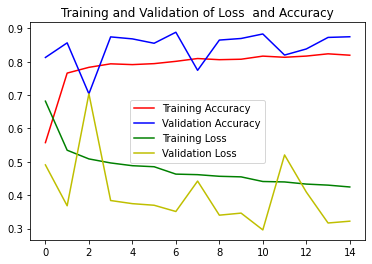

In [96]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [97]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 2s 19ms/step - loss: 0.3189 - accuracy: 0.8786
Loss on test set:  0.3188570439815521
Accuracy on test set:  0.8786311149597168
(2513,)
(2513,)


array([[1237,  164],
       [ 141,  971]], dtype=int64)

In [98]:
model.save('3cnn_garbage.h5')

# Transfer Learning

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

mobilenetv2 = tf.keras.applications.MobileNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


# don't train existing weights
for layer in mobilenetv2.layers:
  layer.trainable = False

In [27]:
import os
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(mobilenetv2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenetv2.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [21]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 200s 283ms/step - loss: 0.4662 - accuracy: 0.7938 - val_loss: 0.5125 - val_accuracy: 0.7497
Epoch 2/15
706/706 [==============================] - 188s 267ms/step - loss: 0.4645 - accuracy: 0.7984 - val_loss: 0.5119 - val_accuracy: 0.7497
Epoch 3/15
706/706 [==============================] - 240s 340ms/step - loss: 0.4607 - accuracy: 0.8005 - val_loss: 0.5099 - val_accuracy: 0.7517
Epoch 4/15
706/706 [==============================] - 179s 254ms/step - loss: 0.4561 - accuracy: 0.8061 - val_loss: 0.5114 - val_accuracy: 0.7497
Epoch 5/15
706/706 [==============================] - 145s 205ms/step - loss: 0.4559 - accuracy: 0.8002 - val_loss: 0.5087 - val_accuracy: 0.7549
Epoch 6/15
706/706 [==============================] - 220s 312ms/step - loss: 0.4552 - accuracy: 0.7991 - val_loss: 0.5031 - val_accuracy: 0.7632
Epoch 7/15
706/706 [==============================] - 188s 266ms/step - loss: 0.4527 - accuracy: 0.8030 - val_loss: 0.5029 -

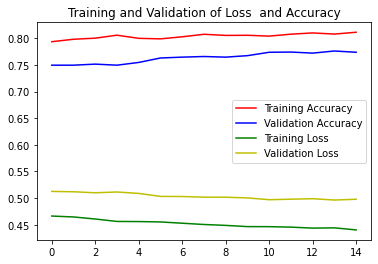

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [25]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 81s 1s/step - loss: 0.4512 - accuracy: 0.7676
Loss on test set:  0.4511851370334625
Accuracy on test set:  0.7676084637641907
(2513,)
(2513,)


array([[1273,  128],
       [ 456,  656]], dtype=int64)

In [27]:
model.save('4mobilenetv2_garbage.h5')

# vgg19 

In [44]:
from keras.applications.vgg19 import VGG19
from keras.layers import Input
input_tensor = Input(shape=(224, 224, 3))
vggmodel19 = VGG19(weights='imagenet', include_top=False, input_shape = (224,224,3))

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
vggmodel191 =Sequential()
vggmodel191.add(Flatten())
vggmodel191.add(Dense(units=4096,activation='relu'))
vggmodel191.add(Dense(units=4096,activation='relu'))
vggmodel191.add(Dense(units=1000,activation='relu'))
vggmodel191.add(Dense(units=2,activation='softmax'))
vggmodel19_new = Model(inputs = vggmodel19.input, outputs= vggmodel191(vggmodel19.output))
vggmodel19_new.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [46]:
for layers in (vggmodel19_new.layers)[:21]:
    print(layers)
    layers.trainable = False

In [47]:
vgg19model =vggmodel19_new 

In [48]:
vgg19model.compile(loss ="categorical_crossentropy", optimizer = "RMSProp", metrics=['accuracy'])

In [49]:
vgg19model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [52]:
history = vgg19model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 5887s 8s/step - loss: 0.4713 - accuracy: 0.7990 - val_loss: 0.4944 - val_accuracy: 0.8520
Epoch 2/15
706/706 [==============================] - 5807s 8s/step - loss: 0.3571 - accuracy: 0.8592 - val_loss: 0.3630 - val_accuracy: 0.8782
Epoch 3/15
706/706 [==============================] - 7232s 10s/step - loss: 0.3390 - accuracy: 0.8670 - val_loss: 0.5706 - val_accuracy: 0.8468
Epoch 4/15
706/706 [==============================] - 6659s 9s/step - loss: 0.3160 - accuracy: 0.8754 - val_loss: 0.3203 - val_accuracy: 0.8743
Epoch 5/15
706/706 [==============================] - 8375s 12s/step - loss: 0.3021 - accuracy: 0.8784 - val_loss: 0.4618 - val_accuracy: 0.8544
Epoch 6/15
706/706 [==============================] - 6432s 9s/step - loss: 0.2694 - accuracy: 0.8893 - val_loss: 0.3406 - val_accuracy: 0.8575
Epoch 7/15
706/706 [==============================] - 7002s 10s/step - loss: 0.2549 - accuracy: 0.8981 - val_loss: 0.3379 - val_accura

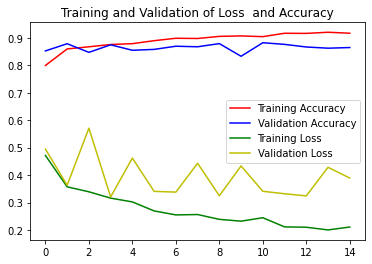

In [53]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [ ]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = vgg19model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = vgg19model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 548s 7s/step - loss: 0.3943 - accuracy: 0.8635
Loss on test set:  0.39429059624671936
Accuracy on test set:  0.8635097742080688


In [ ]:
vgg19model.save('5vgg19_garbage.h5')

# ResNet50

In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D

In [56]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

# add preprocessing layer to the front of VGG
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(units= 1024, activation = 'relu')(x)
predictions = Dense(units = 2 , activation = 'softmax')(x)
model = Model(inputs = resnet50.input, outputs= predictions)

for layer in resnet50.layers:
    layer.trainable = False 

In [57]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [58]:
for layer in resnet50.layers[0:143]:
    layer.trainable = False
for layer in resnet50.layers[143:]:
    layer.trainable = True

In [59]:
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [60]:
model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 2000s 3s/step - loss: 0.7772 - accuracy: 0.5629 - val_loss: 0.6488 - val_accuracy: 0.5674
Epoch 2/15
706/706 [==============================] - 2257s 3s/step - loss: 0.6846 - accuracy: 0.5763 - val_loss: 0.6795 - val_accuracy: 0.5611
Epoch 3/15
706/706 [==============================] - 2080s 3s/step - loss: 0.6628 - accuracy: 0.5994 - val_loss: 0.6064 - val_accuracy: 0.7557
Epoch 4/15
706/706 [==============================] - 18081s 26s/step - loss: 0.6389 - accuracy: 0.6273 - val_loss: 0.5852 - val_accuracy: 0.7497
Epoch 5/15
706/706 [==============================] - 2151s 3s/step - loss: 0.6260 - accuracy: 0.6478 - val_loss: 0.5775 - val_accuracy: 0.7167
Epoch 6/15
706/706 [==============================] - 2156s 3s/step - loss: 0.6172 - accuracy: 0.6651 - val_loss: 0.5795 - val_accuracy: 0.7079
Epoch 7/15
706/706 [==============================] - 2496s 4s/step - loss: 0.6148 - accuracy: 0.6635 - val_loss: 0.5827 - val_accurac

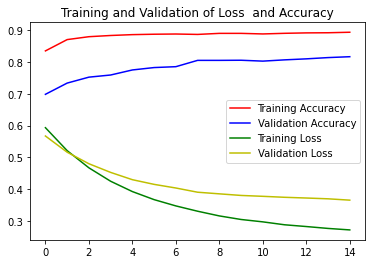

In [61]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [62]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 172s 2s/step - loss: 0.5737 - accuracy: 0.6761
Loss on test set:  0.5737332105636597
Accuracy on test set:  0.6760843396186829
(2513,)
(2513,)


array([[1319,   82],
       [ 732,  380]], dtype=int64)

# mobile net


In [28]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

mobilenet = tf.keras.applications.MobileNet(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [21]:
import glob

In [29]:
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [30]:
history  = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 1253s 2s/step - loss: 0.6411 - accuracy: 0.7678 - val_loss: 0.6041 - val_accuracy: 0.6892
Epoch 2/15
706/706 [==============================] - 1094s 2s/step - loss: 0.5568 - accuracy: 0.8424 - val_loss: 0.5460 - val_accuracy: 0.7179
Epoch 3/15
706/706 [==============================] - 909s 1s/step - loss: 0.4907 - accuracy: 0.8728 - val_loss: 0.5023 - val_accuracy: 0.7453
Epoch 4/15
706/706 [==============================] - 935s 1s/step - loss: 0.4398 - accuracy: 0.8822 - val_loss: 0.4679 - val_accuracy: 0.7545
Epoch 5/15
706/706 [==============================] - 736s 1s/step - loss: 0.4010 - accuracy: 0.8847 - val_loss: 0.4437 - val_accuracy: 0.7589
Epoch 6/15
706/706 [==============================] - 669s 947ms/step - loss: 0.3700 - accuracy: 0.8858 - val_loss: 0.4246 - val_accuracy: 0.7895
Epoch 7/15
706/706 [==============================] - 574s 813ms/step - loss: 0.3476 - accuracy: 0.8874 - val_loss: 0.4121 - val_accuracy

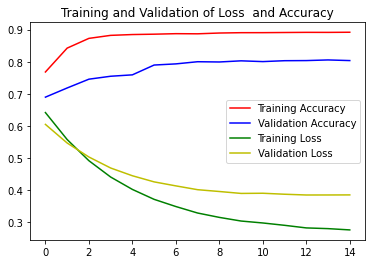

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [33]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 40s 505ms/step - loss: 0.3844 - accuracy: 0.8082
Loss on test set:  0.38444918394088745
Accuracy on test set:  0.8081973791122437
(2513,)
(2513,)


array([[1282,  119],
       [ 363,  749]], dtype=int64)

# nAsnetmobile

In [42]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

nasnetmobile = tf.keras.applications.NASNetMobile(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)


# don't train existing weights
for layer in nasnetmobile.layers:
  layer.trainable = False

In [44]:
from glob import glob
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(nasnetmobile.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=nasnetmobile.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_______________________________________________________________________________________

__________________________________________________________________________________________________
separable_conv_1_bn_reduction_l (None, 7, 7, 176)    704         separable_conv_1_reduction_left1_
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_r (None, 7, 7, 176)    704         separable_conv_1_reduction_right1
__________________________________________________________________________________________________
activation_131 (Activation)     (None, 7, 7, 176)    0           separable_conv_1_bn_reduction_lef
__________________________________________________________________________________________________
activation_133 (Activation)     (None, 7, 7, 176)    0           separable_conv_1_bn_reduction_rig
__________________________________________________________________________________________________
separable_conv_2_reduction_left (None, 7, 7, 176)    35376       activation_131[0][0]             
__________

In [45]:
history  = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 1200s 2s/step - loss: 0.6474 - accuracy: 0.6835 - val_loss: 0.6207 - val_accuracy: 0.6542
Epoch 2/15
706/706 [==============================] - 1278s 2s/step - loss: 0.5722 - accuracy: 0.8323 - val_loss: 0.5653 - val_accuracy: 0.6828
Epoch 3/15
706/706 [==============================] - 1220s 2s/step - loss: 0.5131 - accuracy: 0.8457 - val_loss: 0.5200 - val_accuracy: 0.7167
Epoch 4/15
706/706 [==============================] - 1117s 2s/step - loss: 0.4659 - accuracy: 0.8627 - val_loss: 0.4869 - val_accuracy: 0.7322
Epoch 5/15
706/706 [==============================] - 1102s 2s/step - loss: 0.4273 - accuracy: 0.8726 - val_loss: 0.4608 - val_accuracy: 0.7429
Epoch 6/15
706/706 [==============================] - 1113s 2s/step - loss: 0.3975 - accuracy: 0.8749 - val_loss: 0.4418 - val_accuracy: 0.7469
Epoch 7/15
706/706 [==============================] - 1143s 2s/step - loss: 0.3748 - accuracy: 0.8774 - val_loss: 0.4282 - val_accuracy:

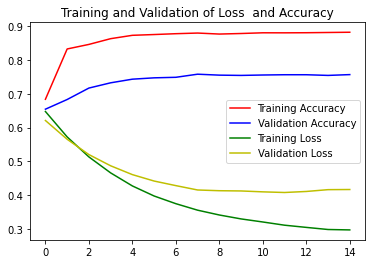

In [46]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [48]:
import glob 

In [49]:

normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 98s 1s/step - loss: 0.4159 - accuracy: 0.7533
Loss on test set:  0.4158722162246704
Accuracy on test set:  0.753282904624939
(2513,)
(2513,)


array([[1279,  122],
       [ 498,  614]], dtype=int64)

# RESNET50v2

In [64]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

resnet50V2 = tf.keras.applications.ResNet50V2(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax'
)

# don't train existing weights
for layer in resnet50V2.layers:
  layer.trainable = False

In [66]:
from glob import glob
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(resnet50V2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50V2.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________

In [67]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 1681s 2s/step - loss: 0.6462 - accuracy: 0.7677 - val_loss: 0.6279 - val_accuracy: 0.6570
Epoch 2/15
706/706 [==============================] - 1559s 2s/step - loss: 0.5662 - accuracy: 0.8319 - val_loss: 0.5763 - val_accuracy: 0.6669
Epoch 3/15
706/706 [==============================] - 1485s 2s/step - loss: 0.5035 - accuracy: 0.8608 - val_loss: 0.5362 - val_accuracy: 0.6821
Epoch 4/15
706/706 [==============================] - 1532s 2s/step - loss: 0.4533 - accuracy: 0.8695 - val_loss: 0.5053 - val_accuracy: 0.6868
Epoch 5/15
706/706 [==============================] - 1482s 2s/step - loss: 0.4151 - accuracy: 0.8721 - val_loss: 0.4801 - val_accuracy: 0.7071
Epoch 6/15
706/706 [==============================] - 1474s 2s/step - loss: 0.3856 - accuracy: 0.8759 - val_loss: 0.4613 - val_accuracy: 0.7187
Epoch 7/15
706/706 [==============================] - 1518s 2s/step - loss: 0.3623 - accuracy: 0.8756 - val_loss: 0.4485 - val_accuracy:

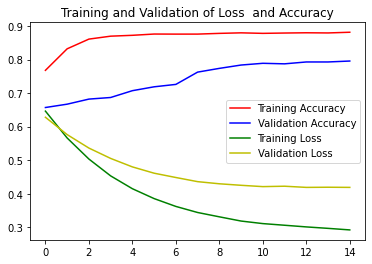

In [68]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [74]:

normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 131s 2s/step - loss: 0.4117 - accuracy: 0.7986
Loss on test set:  0.41170722246170044
Accuracy on test set:  0.7986470460891724
(2513,)
(2513,)


array([[1250,  151],
       [ 355,  757]], dtype=int64)

# InceptionV3

In [75]:
IMAGE_SIZE = [224, 224]
train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'
inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
for layer in inceptionv3.layers:
    layer.trainable = False

In [76]:
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(inceptionv3.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________

In [77]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 2371s 3s/step - loss: 0.6477 - accuracy: 0.6934 - val_loss: 0.6192 - val_accuracy: 0.6486
Epoch 2/15
706/706 [==============================] - 1898s 3s/step - loss: 0.5716 - accuracy: 0.8112 - val_loss: 0.5675 - val_accuracy: 0.6685
Epoch 3/15
706/706 [==============================] - 1724s 2s/step - loss: 0.5130 - accuracy: 0.8434 - val_loss: 0.5255 - val_accuracy: 0.6944
Epoch 4/15
706/706 [==============================] - 2056s 3s/step - loss: 0.4664 - accuracy: 0.8580 - val_loss: 0.4938 - val_accuracy: 0.7043
Epoch 5/15
706/706 [==============================] - 2510s 4s/step - loss: 0.4315 - accuracy: 0.8574 - val_loss: 0.4694 - val_accuracy: 0.7091
Epoch 6/15
706/706 [==============================] - 2462s 3s/step - loss: 0.4013 - accuracy: 0.8627 - val_loss: 0.4495 - val_accuracy: 0.7207
Epoch 7/15
706/706 [==============================] - 2316s 3s/step - loss: 0.3816 - accuracy: 0.8633 - val_loss: 0.4355 - val_accuracy:

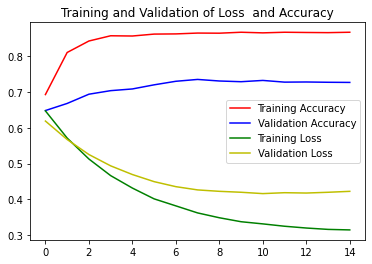

In [78]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [79]:
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 164s 2s/step - loss: 0.4247 - accuracy: 0.7258
Loss on test set:  0.42472803592681885
Accuracy on test set:  0.7258257269859314
(2513,)
(2513,)


array([[1245,  156],
       [ 533,  579]], dtype=int64)

# Heavy Architectures

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 128, activation = 'relu', input_dim = 64))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 4, 4, 64)        

In [42]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 153s 216ms/step - loss: 0.6936 - accuracy: 0.5475 - val_loss: 0.7077 - val_accuracy: 0.4425
Epoch 2/15
706/706 [==============================] - 183s 259ms/step - loss: 0.6888 - accuracy: 0.5576 - val_loss: 0.7625 - val_accuracy: 0.5575
Epoch 3/15
706/706 [==============================] - 183s 259ms/step - loss: 0.6893 - accuracy: 0.5558 - val_loss: 0.6973 - val_accuracy: 0.5575
Epoch 4/15
706/706 [==============================] - 205s 290ms/step - loss: 0.6894 - accuracy: 0.5569 - val_loss: 0.7426 - val_accuracy: 0.4425
Epoch 5/15
706/706 [==============================] - 189s 267ms/step - loss: 0.6893 - accuracy: 0.5562 - val_loss: 0.7885 - val_accuracy: 0.5575
Epoch 6/15
706/706 [==============================] - 189s 267ms/step - loss: 0.6892 - accuracy: 0.5569 - val_loss: 0.6888 - val_accuracy: 0.5575
Epoch 7/15
706/706 [==============================] - 192s 272ms/step - loss: 0.6882 - accuracy: 0.5561 - val_loss: 0.6949 -

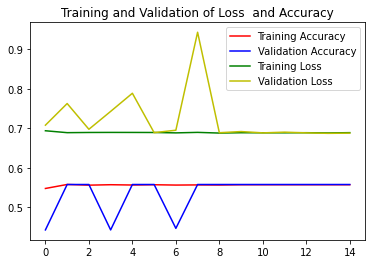

In [46]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [49]:
from glob import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 3s 35ms/step - loss: 0.6876 - accuracy: 0.5575
Loss on test set:  0.6875743269920349
Accuracy on test set:  0.5575010180473328
(2513,)
(2513,)


array([[1401,    0],
       [1112,    0]], dtype=int64)

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 128, activation = 'relu', input_dim = 64))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 4, 4, 64)        

In [54]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 165s 234ms/step - loss: 0.6890 - accuracy: 0.5546 - val_loss: 0.6878 - val_accuracy: 0.5575
Epoch 2/15
706/706 [==============================] - 165s 233ms/step - loss: 0.6881 - accuracy: 0.5569 - val_loss: 0.6874 - val_accuracy: 0.5575
Epoch 3/15
706/706 [==============================] - 156s 221ms/step - loss: 0.6869 - accuracy: 0.5569 - val_loss: 0.6907 - val_accuracy: 0.5575
Epoch 4/15
706/706 [==============================] - 142s 201ms/step - loss: 0.6889 - accuracy: 0.5579 - val_loss: 0.6903 - val_accuracy: 0.5575
Epoch 5/15
706/706 [==============================] - 159s 226ms/step - loss: 0.6884 - accuracy: 0.5561 - val_loss: 0.6882 - val_accuracy: 0.5575
Epoch 6/15
706/706 [==============================] - 192s 271ms/step - loss: 0.6889 - accuracy: 0.5567 - val_loss: 0.6865 - val_accuracy: 0.5575
Epoch 7/15
706/706 [==============================] - 216s 306ms/step - loss: 0.6880 - accuracy: 0.5569 - val_loss: 0.6867 -

# EFFICIENTNET

In [5]:
IMAGE_SIZE = [224, 224]
train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'
effb0 = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
for layer in effb0.layers:
    layer.trainable = False

In [6]:
from glob import glob
from keras.models import load_model
from keras.models import Model
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(effb0.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=effb0.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [8]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 915s 1s/step - loss: 0.6876 - accuracy: 0.5569 - val_loss: 0.6865 - val_accuracy: 0.5575
Epoch 2/15
706/706 [==============================] - 897s 1s/step - loss: 0.6876 - accuracy: 0.5569 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 3/15
706/706 [==============================] - 896s 1s/step - loss: 0.6876 - accuracy: 0.5569 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 4/15
706/706 [==============================] - 900s 1s/step - loss: 0.6872 - accuracy: 0.5569 - val_loss: 0.6869 - val_accuracy: 0.5575
Epoch 5/15
706/706 [==============================] - 908s 1s/step - loss: 0.6878 - accuracy: 0.5569 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 6/15
706/706 [==============================] - 909s 1s/step - loss: 0.6875 - accuracy: 0.5569 - val_loss: 0.6868 - val_accuracy: 0.5575
Epoch 7/15
706/706 [==============================] - 900s 1s/step - loss: 0.6873 - accuracy: 0.5569 - val_loss: 0.6866 - val_accuracy: 0.5575

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=my_relu,input_shape=(224,224,3))) 
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=my_relu)) 
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), activation=my_relu)) 
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), activation=my_relu)) 
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(256, (6, 6), activation=my_relu)) 
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(512, (9, 9), activation=my_relu,padding= 'same')) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(Dense(units = 256,  activation = my_relu))
model.add(Dense(units = 128,  activation = my_relu))
model.add(Dense(units = 64, activation = my_relu))
model.add(Dense(units = 32, activation = my_relu))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
average_pooling2d_30 (Averag (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
average_pooling2d_31 (Averag (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 49, 49, 128)       295040    
_________________________________________________________________
average_pooling2d_32 (Averag (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 19, 19, 128)     

In [32]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.7, beta_2=0.8, epsilon=1e-07, amsgrad=False, name='Adam')

In [33]:
tf.keras.layers.Lambda(lambda x: tf.abs(x))

In [35]:
from keras import backend as K
def my_relu(x):
    return K.maximum(-0.1, x)